## Exercise - DL Tutorial 06

### student names:

Submit you solution by 25 May to manuel.milling@informatik.uni-augsburg.de AND maurice.gerczuk@informatik.uni-augsburg.de

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

In [2]:
import tensorflow as tf
from tensorflow.keras import Input
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten, Dropout
from tensorflow.keras.optimizers import Adam, SGD, RMSprop

import numpy as np

tf.get_logger().setLevel('ERROR')

#### Load MNIST data like in tutorial 3.

In [3]:
from tensorflow.keras.datasets import mnist
num_classes = 10

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.astype(np.float32) / 255
x_test = x_test.astype(np.float32) / 255

x_train = x_train.reshape(x_train.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)

print('x_train shape:\t', x_train.shape)
print('y_train shape:\t', y_train.shape)
print('x_test shape:\t', x_test.shape)
print('y_test shape:\t', y_test.shape)

x_train shape:	 (60000, 784)
y_train shape:	 (60000,)
x_test shape:	 (10000, 784)
y_test shape:	 (10000,)


#### Create one-hot target labels for the TensorFlow model.

In [4]:
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

### 2. Implement model with Sequential API

In [5]:
x_train.shape[1:]

(784,)

#### Define model.

In [7]:
tf.keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [8]:
model_seq = Sequential([
    Flatten(),
    Dense(400, activation="sigmoid"),
    Dense(400, activation="sigmoid"),
    Dense(10, activation="softmax")
])

model_seq.compile(optimizer=SGD(learning_rate=0.1), 
                  loss="categorical_crossentropy", 
                  metrics=['accuracy'])

#### Train model.

In [9]:
history_seq = model_seq.fit(x_train, y_train, epochs=5, batch_size=64)

Epoch 1/5
938/938 [==============================] - 4s 4ms/step - loss: 1.1494 - accuracy: 0.6402
Epoch 2/5
938/938 [==============================] - 4s 4ms/step - loss: 0.4150 - accuracy: 0.8815
Epoch 3/5
938/938 [==============================] - 4s 4ms/step - loss: 0.3468 - accuracy: 0.8994
Epoch 4/5
938/938 [==============================] - 3s 4ms/step - loss: 0.3182 - accuracy: 0.9068
Epoch 5/5
938/938 [==============================] - 4s 4ms/step - loss: 0.2986 - accuracy: 0.9132


#### Evaluate Model

In [10]:
model_seq.evaluate(x_test, y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.2986 - accuracy: 0.9145


[0.29861342906951904, 0.9144999980926514]

In [11]:
model_seq.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 400)               314000    
_________________________________________________________________
dense_1 (Dense)              (None, 400)               160400    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                4010      
Total params: 478,410
Trainable params: 478,410
Non-trainable params: 0
_________________________________________________________________


### 3. Implement model with functional API

#### Define model.

In [12]:
tf.keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [13]:
input_ = tf.keras.layers.Input(shape = x_train.shape[1:])
hidden1 = Dense(400, activation="sigmoid") (input_)
hidden2 = Dense(400, activation="sigmoid") (hidden1)
output_ = Dense(10, activation="softmax") (hidden2)
model_func = tf.keras.Model(inputs=[input_], outputs=[output_], name = "model_func")

In [14]:
model_func.summary()

Model: "model_func"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense (Dense)                (None, 400)               314000    
_________________________________________________________________
dense_1 (Dense)              (None, 400)               160400    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                4010      
Total params: 478,410
Trainable params: 478,410
Non-trainable params: 0
_________________________________________________________________


#### Train model

In [15]:
model_func.compile(loss="categorical_crossentropy",
              optimizer=SGD(learning_rate=0.1),
              metrics=["accuracy"])

history_func = model_func.fit(x_train, y_train, epochs=5, batch_size=64)

Epoch 1/5
938/938 [==============================] - 5s 5ms/step - loss: 1.1494 - accuracy: 0.6402
Epoch 2/5
938/938 [==============================] - 4s 4ms/step - loss: 0.4150 - accuracy: 0.8815
Epoch 3/5
938/938 [==============================] - 3s 4ms/step - loss: 0.3468 - accuracy: 0.8994
Epoch 4/5
938/938 [==============================] - 3s 4ms/step - loss: 0.3182 - accuracy: 0.9068
Epoch 5/5
938/938 [==============================] - 4s 4ms/step - loss: 0.2986 - accuracy: 0.9132


#### Evaluate Model

In [16]:
model_func.evaluate(x_test, y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.2986 - accuracy: 0.9145


[0.29861342906951904, 0.9144999980926514]

### 4. Train model with validation split for 20 epochs

In [17]:
tf.keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [18]:
input_ = tf.keras.layers.Input(shape = x_train.shape[1:])
hidden1 = Dense(400, activation="sigmoid") (input_)
hidden2 = Dense(400, activation="sigmoid") (hidden1)
output_ = Dense(10, activation="softmax") (hidden2)
model_func_2 = tf.keras.Model(inputs=[input_], outputs=[output_], name = "model_func_2")

model_func_2.compile(loss="categorical_crossentropy",
              optimizer=SGD(learning_rate=0.1),
              metrics=["accuracy"])

In [19]:
# The sheet says 15 epochs but markdown text in notebook 20 .. we didn't know what to choose
history_func_2 = model_func_2.fit(x_train, y_train, epochs=15, batch_size=64, validation_split=0.2)

Epoch 1/15
750/750 [==============================] - 3s 4ms/step - loss: 1.3155 - accuracy: 0.5782 - val_loss: 0.5587 - val_accuracy: 0.8372
Epoch 2/15
750/750 [==============================] - 3s 4ms/step - loss: 0.4645 - accuracy: 0.8683 - val_loss: 0.3701 - val_accuracy: 0.8940
Epoch 3/15
750/750 [==============================] - 3s 4ms/step - loss: 0.3740 - accuracy: 0.8920 - val_loss: 0.3268 - val_accuracy: 0.9061
Epoch 4/15
750/750 [==============================] - 3s 4ms/step - loss: 0.3404 - accuracy: 0.9010 - val_loss: 0.3066 - val_accuracy: 0.9093
Epoch 5/15
750/750 [==============================] - 3s 4ms/step - loss: 0.3179 - accuracy: 0.9079 - val_loss: 0.2977 - val_accuracy: 0.9149
Epoch 6/15
750/750 [==============================] - 3s 4ms/step - loss: 0.3038 - accuracy: 0.9115 - val_loss: 0.2758 - val_accuracy: 0.9202
Epoch 7/15
750/750 [==============================] - 3s 4ms/step - loss: 0.2904 - accuracy: 0.9143 - val_loss: 0.2663 - val_accuracy: 0.9230
Epoch 

#### Plot training progress.

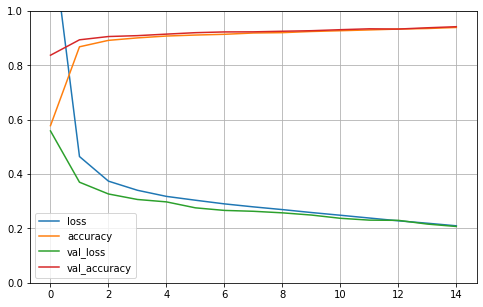

In [20]:
import pandas as pd
import matplotlib.pyplot as plt


# Learning curves: the mean training loss and accuracy measured over each epoch, 
# and the mean validation loss and accuracy measured at the end of each epoch

# Option 1

pd.DataFrame(history_func_2.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show() 

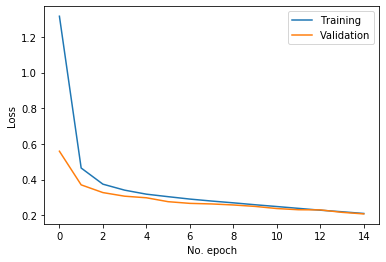

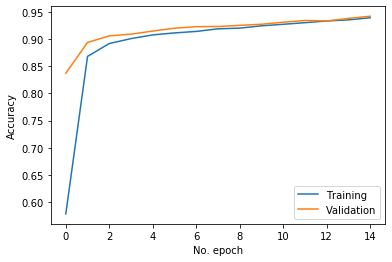

In [21]:
# Option 2

p = plt.figure(1)
plt.plot(history_func_2.history['loss'], label="Training")
plt.plot(history_func_2.history['val_loss'], label="Validation")
plt.ylabel('Loss')
plt.xlabel('No. epoch')
plt.legend(loc="upper right")

p2 = plt.figure(2)
plt.plot(history_func_2.history['accuracy'], label="Training")
plt.plot(history_func_2.history['val_accuracy'], label="Validation")
plt.ylabel('Accuracy')
plt.xlabel('No. epoch')
plt.legend(loc="lower right")

plt.show()

### 5/6. Improve Test result to > 98%

In [46]:
tf.keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

#### Define model.

In [47]:
model_seq_2 = Sequential([
    Flatten(),
    Dense(300, activation="relu"),
    tf.keras.layers.BatchNormalization(),
    Dense(200, activation="relu"),
    tf.keras.layers.BatchNormalization(),
    Dense(10, activation="softmax")
])

model_seq_2.compile(loss="categorical_crossentropy",
              optimizer=Adam(),
              metrics=["accuracy"])

#### Train model.

In [48]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

checkpoint_cb = ModelCheckpoint("model_seq_2.h5", save_best_only=True)
early_stopping_cb = EarlyStopping(patience=3, restore_best_weights=True)


history_seq_2 = model_seq_2.fit(x_train, y_train, epochs=15, validation_split=0.2,
                                callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/15
1500/1500 [==============================] - 6s 3ms/step - loss: 0.2258 - accuracy: 0.9304 - val_loss: 0.1182 - val_accuracy: 0.9631
Epoch 2/15
1500/1500 [==============================] - 5s 4ms/step - loss: 0.1146 - accuracy: 0.9648 - val_loss: 0.1052 - val_accuracy: 0.9665
Epoch 3/15
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0871 - accuracy: 0.9731 - val_loss: 0.0932 - val_accuracy: 0.9746
Epoch 4/15
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0713 - accuracy: 0.9772 - val_loss: 0.0880 - val_accuracy: 0.9732
Epoch 5/15
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0598 - accuracy: 0.9802 - val_loss: 0.0899 - val_accuracy: 0.9748
Epoch 6/15
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0503 - accuracy: 0.9835 - val_loss: 0.0909 - val_accuracy: 0.9735
Epoch 7/15
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0409 - accuracy: 0.9863 - val_loss: 0.0852 - val_accuracy:

#### Plot training progress.

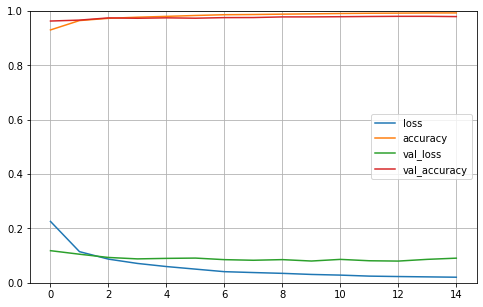

In [49]:
pd.DataFrame(history_seq_2.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) 
plt.show()

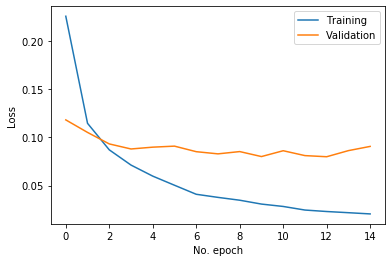

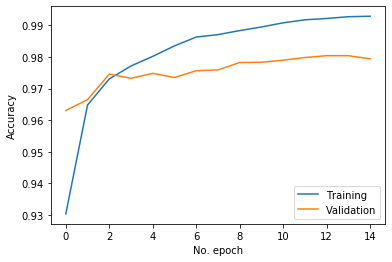

In [50]:
p = plt.figure(1)
plt.plot(history_seq_2.history['loss'], label="Training")
plt.plot(history_seq_2.history['val_loss'], label="Validation")
plt.ylabel('Loss')
plt.xlabel('No. epoch')
plt.legend(loc="upper right")

p2 = plt.figure(2)
plt.plot(history_seq_2.history['accuracy'], label="Training")
plt.plot(history_seq_2.history['val_accuracy'], label="Validation")
plt.ylabel('Accuracy')
plt.xlabel('No. epoch')
plt.legend(loc="lower right")

plt.show()

Evaluate model.

In [51]:
model_seq_2.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0748 - accuracy: 0.9805


[0.07481544464826584, 0.9804999828338623]